#Project Introduction
In this project you will be provided with real world data which is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.

The classification goal is to predict if the client will subscribe a term deposit (variable y).

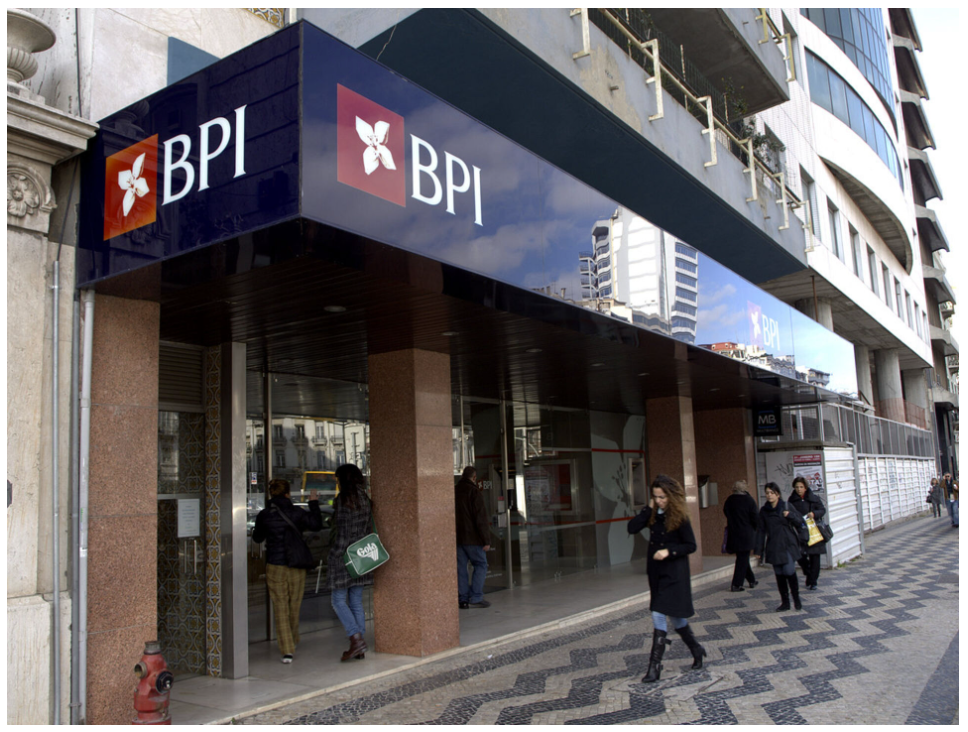

We are a data science team in thier offices and it our task to make the most sense of the data provided by the company



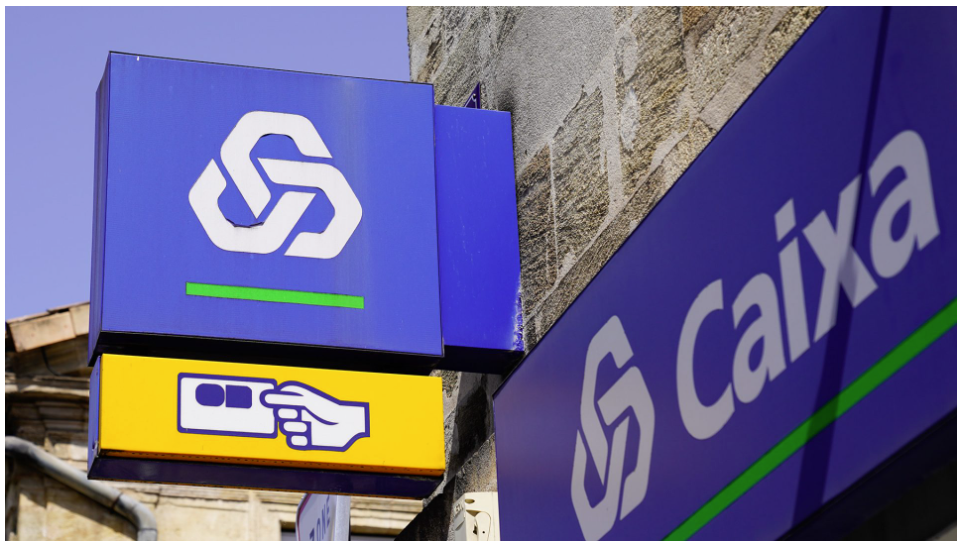

##Let us Get Started!
As you remember our task is to explore our Bank's Marketing campaign and create meaningful insights from the data

The step one should be accessing the data

Our data has been curated by UCI Machine Learning Repository which is an excellent datahouse of various real world problems!

We are going to use the Banking Data described by our friends in UCI here

The data can also be downloaded from the Tech I.S. Github Repository

###Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

##Good Start!
Now that you have your dataset , let us go through the problems one by one!

##Section I : Data Loading

Part I : Load the dataset into the notebook

Part II : Explore and make note of Attribute Information from UCI

Part III : What is the significance of the y column in the dataset and what are the value counts of the y column?

Part IV : What is the ratio of the two classes ? Are they balanced ?

In [ ]:
#na_vals = ['NA','na','unknown','nan','nonexistent']
dataset = pd.read_csv('/content/drive/MyDrive/Tech I.S/csv files/portu_banking_final.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [179]:
y.value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64>

##Section II : Data Cleaning
Since this is real world data , A good practice is to make sure the dataset is devoid of any nuances

Part I : Get the dtypes of all the columns of our dataset

Part II : Refering to the UCI data description , explore the data in your columns and check if there are any errors

Part III : Make note of the deviation in the dataset compared to the description provided by UCI

Part IV : Using Data Cleaning principles you learned from Pandas Tutorial) figure out the best ways to get rid of the dirty data

 Part V : Print the cleaned data

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

There are errors in the data

## Exploring age Column 

In [ ]:
dataset['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [ ]:
dataset['age']=dataset['age'].replace({'35-30':33,"30-35":33,'25-30':28,'18-25':21,'30-32':31,'50-55':52,'45-50':48,'20-25':23,'20-40':30,'35-40':38,'30-40':35,})

In [ ]:
dataset.age.unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', 33, '25', '57', '63', '58', '60', '64', '51', '23', '20',
       '74', '80', '61', 28, '62', '75', '21', '82', '77', 21, 31, '70',
       52, '76', '73', '66', '22', '71', '19', '79', '88', '65', '67',
       '81', '18', '84', '69', '98', '85', '83', '78', '92', 48, 23, 30,
       38, '86', '94', '17', '91', '89', '87', '95', 35, 56, 39, 53, 37,
       22, 45, 24, 50, 58, 27, 32, 51, 41, 49, 43, 44, 29, 26, 57, 25, 42,
       46, 67, 34, 54, 40, 47, 62, 75, 55, 36, 59, 78, 70, 60, 20, 66, 61,
       88, 18, 68, 71, 73, 80, 79, 63, 76, 83, 65, 19, 86, 17, 72, 69, 81,
       64, 77, 74, 85, 82], dtype=object)

In [ ]:
dataset['age']=dataset['age'].astype(int)

In [ ]:
dataset.age.dtype

dtype('int64')

##Exploring Job column

In [ ]:
dataset.job.unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student', 'MANAGEMENT', 'RETIRED',
       'STUDENT', 'ADMIN.', 'TECHNICIAN', 'BLUE-COLLAR', 'HOUSEMAID',
       'SERVICES', 'UNKNOWN'], dtype=object)

In [ ]:
dataset.job = dataset.job.replace({'BLUE-COLLAR':'blue-collar','TECHNICIAN':'technician','MANAGEMENT':'management','SERVICES':'services','RETIRED':'retired','ADMIN.':'admin.','HOUSEMAID':'housemaid','STUDENT':'student','UNKNOWN':'unknown'})

In [ ]:
dataset.job.unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

##Exploring marital column

In [ ]:
dataset.marital.unique()

array(['married', 'single', 'divorced', 'D', 'unknown', 'S', 'M'],
      dtype=object)

In [ ]:
dataset.marital=dataset.marital.replace({'M':'married','S':'single','D':'divorced'})

In [ ]:
dataset.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

##Exploring Education column

In [ ]:
dataset.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'basic-6y',
       'basic-9y', 'basic-4y', 'illiterate'], dtype=object)

In [ ]:
dataset.education=dataset.education.replace({'basic-4y':'basic.4y','basic-6y':'basic.6y','basic-9y':'basic.9y'})

In [ ]:
dataset.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

##Exploring default column

In [ ]:
dataset.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [ ]:
dataset.default=dataset.default.replace({'unknown':'no'})

In [ ]:
dataset.default.value_counts()

no     41185
yes        3
Name: default, dtype: int64

##Exploring housing column

In [ ]:
dataset.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [ ]:
dataset.housing.replace({'unknown':"yes"},inplace=True)

In [ ]:
dataset.housing.value_counts()

yes    22566
no     18622
Name: housing, dtype: int64

##Exploring loan column

In [ ]:
dataset.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [ ]:
dataset.loan.replace({'unknown':'no'},inplace=True)

In [ ]:
dataset.loan.value_counts()

no     34940
yes     6248
Name: loan, dtype: int64

##Exploring contact column

In [ ]:
dataset.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

##Section III : Exploring data with Group by
In this section , we must create some primitive EDA

Use the groupby function on the mean of the following columns :

I : y

II : job

III : marital

IV : education

Make a note of what you learn from the outputs !

In [ ]:
dataset.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.910775,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [ ]:
dataset.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187008,254.312128,2.623489,956.046344,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555219,264.542360,2.558461,987.105468,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,987.448489,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.360465,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.947924,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926682,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [ ]:
dataset.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.898959,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.306924,257.438623,2.57281,967.969753,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158109,261.524378,2.53380,952.243603,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [ ]:
dataset.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,970.015326,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,40.447644,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,39.062035,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.998108,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.079725,252.533855,2.586115,962.482548,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.878041,253.223373,2.563527,953.286982,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


##Section IV : Exploratory Data Analysis
Let us put Matplotlib to use !

Part I : Create bar graphs to the frequency of purchase with respect to the job , martial etc

Part II : Also create stacked bars to same data columns with respect to

Part III : Explore the age column using a histogram and note down your observations

In [ ]:
cols=['job','marital','education','default','loan','contact','poutcome','day_of_week']


In [180]:
#x=dataset['job'].value_counts().values
#y=dataset['job'].value_counts().index

#sns.barplot(x,y)

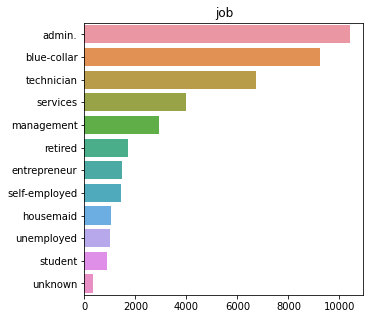

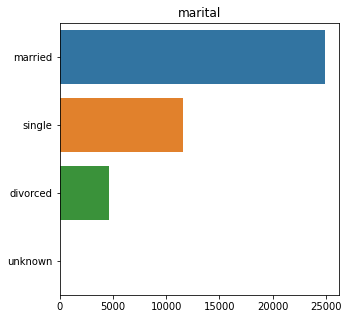

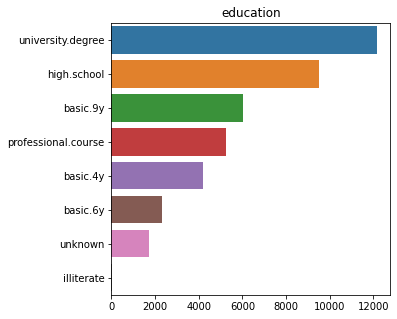

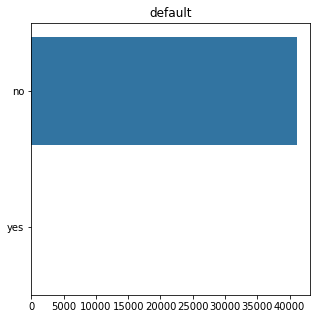

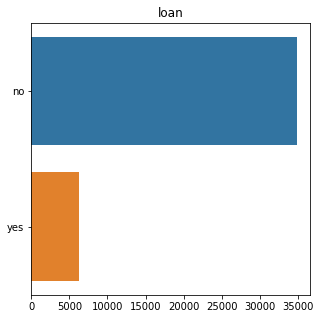

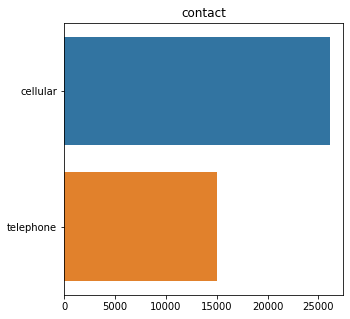

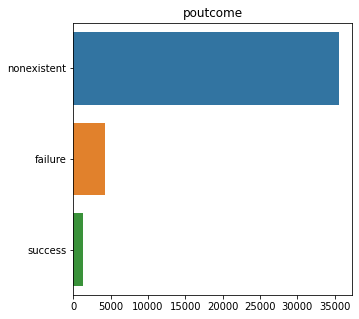

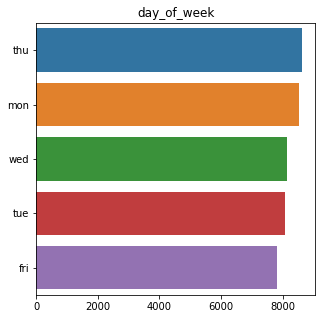

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
for col in cols:
  plt.figure(figsize=(5,5))
  sns.barplot(dataset[col].value_counts().values,dataset[col].value_counts().index)
  plt.title(col)
plt.show()

###Section V : Categorical Variable Encoding
Part I : Create dummy variables for your categorial variables

part II : Explore your new dataset with these new dummy variables !

##Converting categorical values to numerical values creating dummy variable

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
df_cat=dataset.select_dtypes(include=[object])

In [ ]:
col_cat=df_cat.columns
print(col_cat)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [ ]:
data_new=pd.get_dummies(dataset,columns=col_cat)

In [ ]:
data_new

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999.0,0,1.4,94.465,-41.8,4.866,5228.1,...,0,0,0,0,1,0,0,0,1,0
41184,31,196,2,999.0,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,0,1,0,0,0,1,0
41185,42,62,3,999.0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,0,1,0
41186,48,200,2,999.0,0,-3.4,92.431,-26.9,0.742,5017.5,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  float64
 4   previous                       41188 non-null  int64  
 5   emp_var_rate                   41188 non-null  float64
 6   cons_price_idx                 41188 non-null  float64
 7   cons_conf_idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr_employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

In [ ]:
#le=preprocessing.LabelEncoder()
#le.fit(dataset['job'])
#dataset['job']=le.transform(dataset['job'])
#dataset['job'].dtype

##Section VI : Preliminary Training
Part I : Import your Logisitc Regression libraries

Part II : Split your train and test dataset and train on the data

Part III : Make note of the classification report and other metrics

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split
x=data_new.drop(['y'],axis=1)
y=data_new['y']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=7)

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7321
           1       0.64      0.38      0.48       917

    accuracy                           0.91      8238
   macro avg       0.79      0.68      0.71      8238
weighted avg       0.89      0.91      0.90      8238



##Section VII : Let's Improve the performance !
Part 0 : What was your answer to Section - Part IV? Do you think class imbalance affects the model performance? Explore SMOTE implementation

Part I : Make note of the performance from the last training

Part II : Try implementing SMOTE to balance the two class labels

Part III : Make note of the y label data now , what are the rations now ?

Class imbalance is affecting the performance

In [ ]:
data_new.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,y_smote=smote.fit_resample(x,y)

In [ ]:
X_smote.shape

(73096, 60)

In [ ]:
y_smote.value_counts()

0    36548
1    36548
Name: y, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=.2)

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred=model.predict(x_test)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7315
           1       0.88      0.88      0.88      7305

    accuracy                           0.88     14620
   macro avg       0.88      0.88      0.88     14620
weighted avg       0.88      0.88      0.88     14620



In [ ]:
y_smote.value_counts()

0    36548
1    36548
Name: y, dtype: int64